# *Lab 6:Outlier and fraud detection*
### **ID1:206094278,ID2:205926660** 


In [1]:
import pandas as pd
import numpy as np
import os
import io
from matplotlib import pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.decomposition import PCA
#pd.set_option('display.max_rows', None)


In [2]:
# importing the data and organize it
df_2019 = pd.read_csv("votes per city 2019b.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020 = pd.read_csv("votes per city 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')

dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה',
              'אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
names = ["אמת", "ג", "ודעם","טב", "ל", "מחל","פה","שס"]
rev_names = [dict_party[name][::-1] for name in list(names)]


##### Question 1 section a:<br>
Since "העבודה-גשר-מרץ" ran in 2019 as "המחנה הדמוקרטי" and "העבודה-גשר", first we need to concatecate them.

In [3]:
df_2019["אמת"] = df_2019["אמת"] + df_2019["מרצ"] 
df_2019["מועד"] = 2019
df_2020["מועד"] = 2020

df_2019 = df_2019.loc[:,["בזב","כשרים", "אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס", "כף", "מועד", "סמל ישוב"]]

df_2020 = df_2020.loc[:,["בזב","כשרים", "אמת", "ג", "ודעם",
                             "טב", "ל", "מחל","פה","שס", "נץ", "מועד", "סמל ישוב"]]

Since we wish to concatecate the two data frames, first we need to rename "עוצמה יהודית"'s vote sign

In [4]:
# rename 'עוצמה יהודית''s vote sign
df_2019 = df_2019.rename(columns = {'כף':'נץ'}, inplace = False)

Merge the two data frames

In [5]:
df_united = pd.concat([df_2019,df_2020],join="inner")
display(df_united)

,בזב,כשרים,אמת,ג,ודעם,טב,ל,מחל,פה,שס,נץ,מועד,סמל ישוב
שם ישוב,,,,,,,,,,,,,
שחר,517,377,44,8,0,28,11,128,98,39,3,2019,7
תירוש,332,245,2,4,0,11,0,93,6,104,4,2019,10
"ניר ח""ן",406,287,37,1,1,13,10,57,94,4,5,2019,11
חצבה,502,373,56,2,0,17,18,25,216,1,4,2019,13
נועם,308,227,1,4,0,8,1,158,13,36,4,2019,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,488,414,5,5,0,163,1,161,63,12,2,2020,665
תקוע,2158,1615,28,33,3,760,35,583,85,34,29,2020,3563
תראבין אצאנע שבט,520,48,0,0,43,0,0,0,4,0,0,2020,970


Normalize each observation vector

In [6]:
# Transpose for easy summation
df_united_norm = df_united.T

# Normalize each observation vector
df_united_norm = df_united_norm.iloc[2:11,].div(df_united_norm.iloc[2:11,].sum()).T

# As requested in question 1 section a.
df_united_norm["מועד"] = df_united["מועד"]
df_united_norm["כשרים"] = df_united["כשרים"]
df_united_norm["סמל ישוב"] = df_united["סמל ישוב"]
df_united_norm["בזב"] = df_united["בזב"]
df_united_norm

,אמת,ג,ודעם,טב,ל,מחל,פה,שס,נץ,מועד,כשרים,סמל ישוב,בזב
שם ישוב,,,,,,,,,,,,,
שחר,0.122563,0.022284,0.000000,0.077994,0.030641,0.356546,0.272981,0.108635,0.008357,2019,377,7,517
תירוש,0.008929,0.017857,0.000000,0.049107,0.000000,0.415179,0.026786,0.464286,0.017857,2019,245,10,332
"ניר ח""ן",0.166667,0.004505,0.004505,0.058559,0.045045,0.256757,0.423423,0.018018,0.022523,2019,287,11,406
חצבה,0.165192,0.005900,0.000000,0.050147,0.053097,0.073746,0.637168,0.002950,0.011799,2019,373,13,502
נועם,0.004444,0.017778,0.000000,0.035556,0.004444,0.702222,0.057778,0.160000,0.017778,2019,227,15,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,0.012136,0.012136,0.000000,0.395631,0.002427,0.390777,0.152913,0.029126,0.004854,2020,414,665,488
תקוע,0.017610,0.020755,0.001887,0.477987,0.022013,0.366667,0.053459,0.021384,0.018239,2020,1615,3563,2158
תראבין אצאנע שבט,0.000000,0.000000,0.914894,0.000000,0.000000,0.000000,0.085106,0.000000,0.000000,2020,48,970,520


##### Question 1 section b:<br>

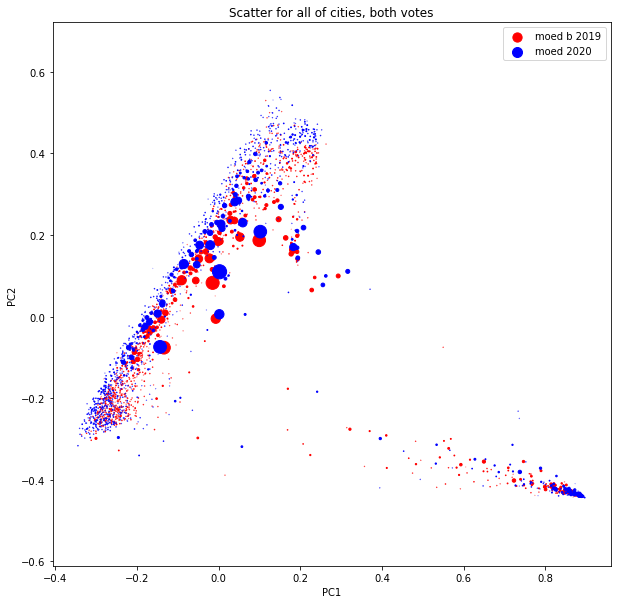

In [7]:
#PCA by parites
pca = PCA(n_components=8)
X_pca=pca.fit_transform(df_united_norm.iloc[:,:8])
# X_pca
s = (df_united_norm["כשרים"]/df_united_norm["כשרים"].max())* 200

pca_df = pd.DataFrame(X_pca)
tosefet_vec = df_united.loc[:,["מועד", "בזב", "סמל ישוב"]].reset_index()

Scatter_pca = pd.DataFrame({"X" : pca_df[0], "Y" : pca_df[1], "moed" : tosefet_vec["מועד"], "bazab" : tosefet_vec["בזב"] , "semel" : tosefet_vec["סמל ישוב"]})

plt.figure(figsize=(10,10))
plt.scatter(Scatter_pca.iloc[:1214,0], Scatter_pca.iloc[:1214,1], s = s.iloc[:1214], 
            color="red", label ="moed b 2019")  # Here draw circles with area proportional to city size
plt.scatter(Scatter_pca.iloc[1214:,0], Scatter_pca.iloc[1214:,1], s = s.iloc[1214:], 
            color="blue", label = "moed 2020")  # Here draw circles with area proportional to city size
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title('Scatter for all of cities, both votes')
plt.axis('equal')
plt.show()



#### Answer:
PC2 can be interpreted as the number of pepole with the right to vote in the settelment<br>
PC1 can be interpreted as the percentage of minorities in the locality

##### Question 1 section c:<br>


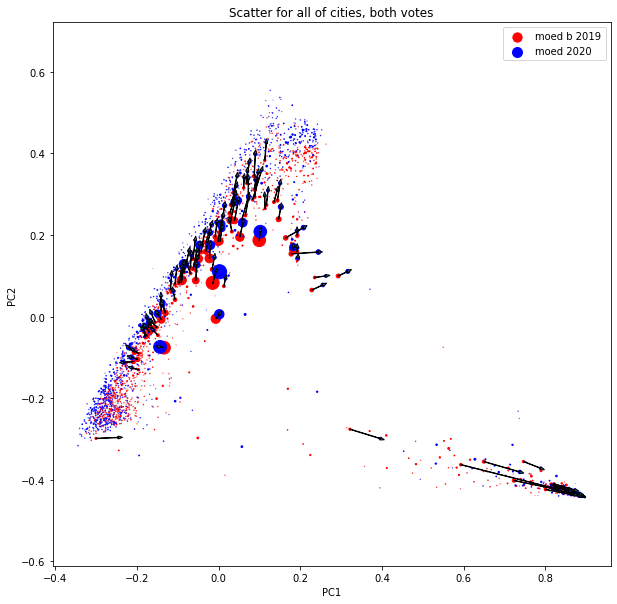

In [8]:
#PCA by parites
pca = PCA(n_components=8)
X_pca=pca.fit_transform(df_united_norm.iloc[:,:8])
# X_pca
s = (df_united_norm["כשרים"]/df_united_norm["כשרים"].max())* 200

pca_df = pd.DataFrame(X_pca)
tosefet_vec = df_united.loc[:,["מועד", "בזב", "סמל ישוב"]].reset_index()

Scatter_pca = pd.DataFrame({"X" : pca_df[0], "Y" : pca_df[1], "moed" : tosefet_vec["מועד"], "bazab" : tosefet_vec["בזב"] , "semel" : tosefet_vec["סמל ישוב"]})

plt.figure(figsize=(10,10))
plt.scatter(Scatter_pca.iloc[:1214,0], Scatter_pca.iloc[:1214,1], s = s.iloc[:1214], 
            color="red", label ="moed b 2019")  # Here draw circles with area proportional to city size
plt.scatter(Scatter_pca.iloc[1214:,0], Scatter_pca.iloc[1214:,1], s = s.iloc[1214:], 
            color="blue", label = "moed 2020")  # Here draw circles with area proportional to city size

big_pca = Scatter_pca[Scatter_pca.bazab > 10000]
big_pca = big_pca.sort_values("semel")
big_pca = big_pca[big_pca.semel!=502]
big_pca_19= big_pca[big_pca.moed==2019].sort_values("semel")
big_pca_20= big_pca[big_pca.moed==2020].sort_values("semel")


for i in range(0,len(big_pca_19)):
    plt.arrow(big_pca_19.iloc[i,0],big_pca_19.iloc[i,1], (big_pca_20.iloc[i,0]-big_pca_19.iloc[i,0]),(big_pca_20.iloc[i,1]-big_pca_19.iloc[i,1]),head_width=0.007)

    
plt.arrow(-0.015,0.08,0.008,0.03,head_width=0.006)    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title('Scatter for all of cities, both votes' )
plt.axis('equal')
plt.show()



#### Answer:
From the arrows it is possibole to see that the voters Have become extreme in relative to PC1 and PC2<br>
in other words,the affect of the PC1 and PC2 on the sttelments is "stronger"

##### Question 1 section d:<br>

In [9]:
big_pca = Scatter_pca
big_pca = big_pca.sort_values("semel")
big_pca = big_pca[big_pca.semel!=502]
big_pca_19= big_pca[big_pca.moed==2019].sort_values("semel")
big_pca_20= big_pca[big_pca.moed==2020].sort_values("semel")
listofdistances = []
for i in range(0,len(big_pca_19)):
    dist = [(big_pca_20.iloc[i,0]-big_pca_19.iloc[i,0]) ,(big_pca_20.iloc[i,1]-big_pca_19.iloc[i,1]),big_pca_19.iloc[i,4]]
    listofdistances.append(dist)

sq_dist = []
for i in listofdistances:
    dist = [pow(((pow(i[0],2) + pow(i[1],2))),(1/2)),i[2]]
    sq_dist.append(dist)
# The top 3 are the ones with the biggest distance
sorted(sq_dist, reverse=True)[0:3]

[[0.4795339913487165, 1359],
 [0.44664588700018515, 1170],
 [0.380192477645129, 1367]]

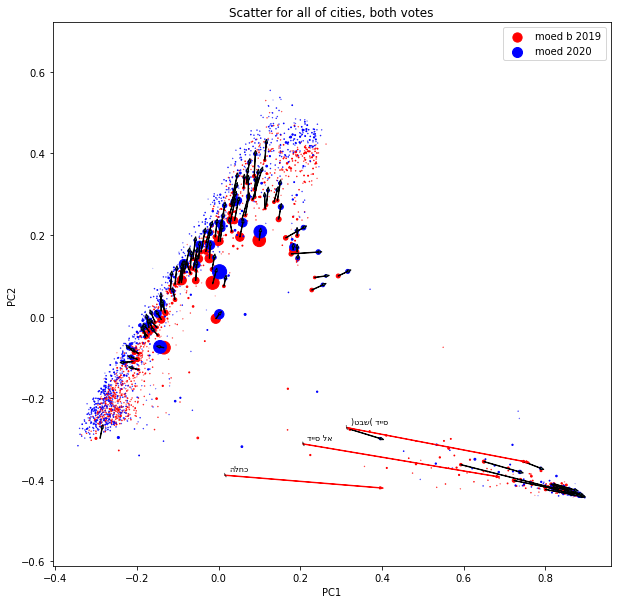

In [10]:
#PCA by parites
pca = PCA(n_components=8)
X_pca=pca.fit_transform(df_united_norm.iloc[:,:8])
# X_pca
s = (df_united_norm["כשרים"]/df_united_norm["כשרים"].max())* 200

pca_df = pd.DataFrame(X_pca)
tosefet_vec = df_united.loc[:,["מועד", "בזב", "סמל ישוב"]].reset_index()

Scatter_pca = pd.DataFrame({"X" : pca_df[0], "Y" : pca_df[1], "moed" : tosefet_vec["מועד"], "bazab" : tosefet_vec["בזב"] , "semel" : tosefet_vec["סמל ישוב"]})

plt.figure(figsize=(10,10))
plt.scatter(Scatter_pca.iloc[:1214,0], Scatter_pca.iloc[:1214,1], s = s.iloc[:1214], 
            color="red", label ="moed b 2019")  # Here draw circles with area proportional to city size
plt.scatter(Scatter_pca.iloc[1214:,0], Scatter_pca.iloc[1214:,1], s = s.iloc[1214:], 
            color="blue", label = "moed 2020")  # Here draw circles with area proportional to city size

big_pca = Scatter_pca[Scatter_pca.bazab > 10000]
big_pca = big_pca.sort_values("semel")
big_pca = big_pca[big_pca.semel!=502]
big_pca_19= big_pca[big_pca.moed==2019].sort_values("semel")
big_pca_20= big_pca[big_pca.moed==2020].sort_values("semel")


for i in range(0,len(big_pca_19)):
    if i==10:
        continue
    plt.arrow(big_pca_19.iloc[i,0],big_pca_19.iloc[i,1], (big_pca_20.iloc[i,0]-big_pca_19.iloc[i,0]),(big_pca_20.iloc[i,1]-big_pca_19.iloc[i,1]),head_width=0.006)

    
plt.arrow(big_pca_19.iloc[10,0]+0.01,big_pca_19.iloc[10,1],0.005,0.025,head_width=0.006) 
big_pca = Scatter_pca
big_pca = big_pca.sort_values("semel")
big_pca = big_pca[big_pca.semel.isin([1359,1170,1367])]
big_pca_19= big_pca[big_pca.moed==2019].sort_values("semel")
big_pca_20= big_pca[big_pca.moed==2020].sort_values("semel")
for i in range(0,len(big_pca_19)):
    plt.arrow(big_pca_19.iloc[i,0],big_pca_19.iloc[i,1],
    (big_pca_20.iloc[i,0]-big_pca_19.iloc[i,0]),(big_pca_20.iloc[i,1]-big_pca_19.iloc[i,1]),head_width=0.006,color="red")
    plt.annotate(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[i,4]].index[0][::-1],(big_pca_19.iloc[i,0],big_pca_19.iloc[i,1]), xytext=(big_pca_19.iloc[i,0]+0.01,big_pca_19.iloc[i,1]+0.01), 
        arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.5),size=8)
plt.arrow(-0.015,0.08,0.008,0.03,head_width=0.006)     
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title('Scatter for all of cities, both votes' )
plt.axis('equal')
plt.show()


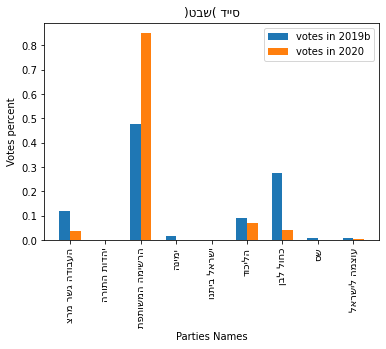

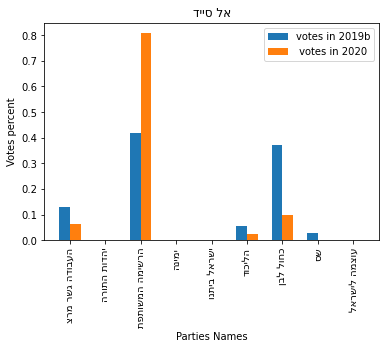

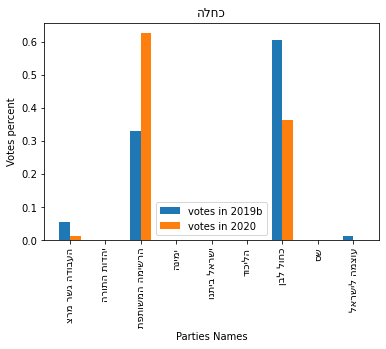

In [11]:
dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה','נץ':'עוצמה לישראל','אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
fig,ax=plt.subplots()
ax.bar(np.arange(9)-0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[0,4]].iloc[0,:9]),width=0.3,label="votes in 2019b")
ax.bar(np.arange(9)+0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[0,4]].iloc[1,:9]),width=0.3,label="votes in 2020")
ax.legend()
ax.set_xticks(np.arange(9))
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_title(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[0,4]].index[0][::-1])
ax.set_xticklabels([dict_party[i][::-1] for i in df_united_norm.columns[0:9]] ,rotation=90)
plt.show()

fig,ax=plt.subplots()
ax.bar(np.arange(9)-0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[1,4]].iloc[0,:9]),width=0.3,label="votes in 2019b")
ax.bar(np.arange(9)+0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[1,4]].iloc[1,:9]),width=0.3,label=" votes in 2020")
ax.legend()
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_title(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[1,4]].index[0][::-1])
ax.set_xticks(np.arange(9))
ax.set_xticklabels([dict_party[i][::-1] for i in df_united_norm.columns[0:9]] ,rotation=90)
plt.show()

fig,ax=plt.subplots()
ax.bar(np.arange(9)-0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[2,4]].iloc[0,:9]),width=0.3,label="votes in 2019b")
ax.bar(np.arange(9)+0.15,list(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[2,4]].iloc[1,:9]),width=0.3,label="votes in 2020")
ax.set_title(df_united_norm[df_united_norm.loc[:,'סמל ישוב']==big_pca_19.iloc[2,4]].index[0][::-1])
ax.set_xticks(np.arange(9))
ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_xticklabels([dict_party[i][::-1] for i in df_united_norm.columns[0:9]] ,rotation=90)
ax.legend()
plt.show()

#### Answer:
we can see that in those settelments the joint list party got more votes significantly<br>
and "took" votes from the labor party and the blue&white party

#### Question 2 section a:

In [13]:
df_2019_ballots = pd.read_csv("vote per ballot 2019.csv", encoding = 'iso-8859-8',index_col=["סמל ישוב","קלפי"])
df_2020_ballots = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8',index_col=["סמל ישוב","קלפי"])

df_2019_ballots["אמת"] = df_2019_ballots["אמת"] + df_2019_ballots["מרצ"] 


df_2019_ballots = df_2019_ballots.loc[:,["בזב","כשרים", "אמת","מרצ" ,"ג", "ודעם","שם ישוב",
                             "טב", "ל","מחל","פה","שס", "כף"]]

df_2020_ballots = df_2020_ballots.loc[:,["בזב","כשרים", "אמת", "ג", "ודעם","שם ישוב",
                             "טב", "ל","מחל","פה","שס", "נץ"]]
df_2019_ballots = df_2019_ballots.rename(columns = {'כף':'נץ'}, inplace = False)
df_merged_ballots = df_2019_ballots.join(df_2020_ballots,lsuffix=" 2019",rsuffix=" 2020",how="inner")
df_merged_ballots=df_merged_ballots[df_merged_ballots.loc[:,'שם ישוב 2019']!="מעטפות חיצוניות"]
df_merged_ballots.head()


FileNotFoundError: [Errno 2] No such file or directory: 'vote per ballot 2019b.csv'

In [ ]:
df_merged_sub = df_merged_ballots.loc[:,['בזב 2019',"כשרים 2019","שם ישוב 2019","בזב 2020","כשרים 2020"]]
df_merged_sub["ratio 2019"] = df_merged_ballots.loc[:,"כשרים 2019"].div(df_merged_ballots.loc[:,"בזב 2019"])
df_merged_sub["ratio 2020"] = df_merged_ballots.loc[:,"כשרים 2020"].div(df_merged_ballots.loc[:,"בזב 2020"])
df_merged_sub["mean ele"] = (df_merged_sub.loc[:,"ratio 2019"] + df_merged_sub.loc[:,"ratio 2020"])*0.5
df_merged_sub["diff"] = abs(df_merged_sub.loc[:,"ratio 2019" ] - df_merged_sub.loc[:,"ratio 2020"])
df_merged_sub.head()

display(df_merged_sub.sort_values("mean ele",ascending=False).head(10))
display(df_merged_sub.sort_values("diff",ascending=False).head(10))

In [ ]:
ten_mean=df_merged_ballots[df_merged_ballots.index.isin(df_merged_sub.sort_values("mean ele",ascending=False).head(10).index)]
ten_diff=df_merged_ballots[df_merged_ballots.index.isin(df_merged_sub.sort_values("diff",ascending=False).head(10).index)]
Ddata=df_merged_sub.sort_values("mean ele",ascending=False)
Ddata.rename(columns={"בזב 2019":"bazab 2019","כשרים 2019":"kosher 2019","בזב 2020":"bazab 2020","כשרים 2020":"kosher 2020"},inplace=True)
Ddata2=df_merged_sub.sort_values("diff",ascending=False)
Ddata2.rename(columns={"בזב 2019":"bazab 2019","כשרים 2019":"kosher 2019","בזב 2020":"bazab 2020","כשרים 2020":"kosher 2020"},inplace=True)
ten_mean_19=ten_mean.iloc[:,0:12]
city_mean_19=ten_mean_19.loc[:,"שם ישוב 2019"]
ten_mean_19=ten_mean_19.drop(columns=["שם ישוב 2019","בזב 2019"]).div(np.array(ten_mean_19.loc[:,"כשרים 2019"]),axis=0)
ten_mean_19=ten_mean_19.drop(columns=["כשרים 2019"])

ten_mean_20=ten_mean.iloc[:,12:24]
city_mean_20=ten_mean_20.loc[:,"שם ישוב 2020"]
ten_mean_20=ten_mean_20.drop(columns=["שם ישוב 2020","בזב 2020"]).div(np.array(ten_mean_20.loc[:,"כשרים 2020"]),axis=0)
ten_mean_20=ten_mean_20.drop(columns=["כשרים 2020"])

## plots for artical c
fig,ax=plt.subplots(2,5,figsize=(18,10))
plt.subplots_adjust(hspace =1.5,wspace =1)
width = 0.3
for i in range(0,2):
    for j in range(0,5):
        if i==0:
            ax[i,j].bar(np.arange(9)-0.15,ten_mean_19.iloc[j,:],width,label="2019")
            ax[i,j].bar(np.arange(9)+0.15,ten_mean_20.iloc[j,:],width,label="2020")
            ax[i,j].set_xticks(np.arange(9))
            ax[i,j].legend()
            ax[i,j].set_title(city_mean_19[j][::-1] + " ballot num "+str(ten_mean_19.index[j][1])+"\n"+str(Ddata.iloc[j,[0,1,3,4]])[:75] )
            ax[i,j].set_ylabel('Votes percent')
            ax[i,j].set_xlabel('Parties Names')
            ax[i,j].set_xticklabels([dict_party[ten_mean_19.columns[i][:len(ten_mean_19.columns[i])-5]][::-1] for i in range(9)]  ,rotation=90)
        else:
            ax[i,j].bar(np.arange(9)-0.15,ten_mean_19.iloc[j+5,:],width,label="2019")
            ax[i,j].bar(np.arange(9)+0.15,ten_mean_20.iloc[j+5,:],width,label="2020")
            ax[i,j].set_xticks(np.arange(9))
            ax[i,j].legend()
            ax[i,j].set_title(city_mean_19[j+5][::-1]+ " ballot num"+str(ten_mean_20.index[j+5][1])+"\n"+str(Ddata.iloc[j+5,[0,1,3,4]])[:75])
            ax[i,j].set_ylabel('Votes percent')
            ax[i,j].set_xlabel('Parties Names')
            ax[i,j].set_xticklabels([dict_party[ten_mean_19.columns[i][:len(ten_mean_19.columns[i])-5]][::-1] for i in range(9)] ,rotation=90)

plt.show()            

#### Answer:
In most of the ballots with the highest voteing rate it seems that there are not a significant difference between the 2019<br> and the 2020 election.<br>
But ballots that do have differences in votes distribution between the two elections are mostly among patries that have the<br> same worldview.<br>
An anomaly can be seen in the ballots in "carmim" and "ashdod" which in the 2019 had more kosher votes then bazab<br>
this may be due to farud but there can also be other reasons like Accessible ballots.

In [ ]:
ten_diff_19=ten_diff.iloc[:,0:12]
city_diff_19=ten_diff_19.loc[:,"שם ישוב 2019"]
ten_diff_19=ten_diff_19.drop(columns=["שם ישוב 2019","בזב 2019"]).div(np.array(ten_diff_19.loc[:,"כשרים 2019"]),axis=0)
ten_diff_19=ten_diff_19.drop(columns=["כשרים 2019"])

ten_diff_20=ten_diff.iloc[:,12:24]
city_diff_20=ten_diff_20.loc[:,"שם ישוב 2020"]
ten_diff_20=ten_diff_20.drop(columns=["שם ישוב 2020","בזב 2020"]).div(np.array(ten_diff_20.loc[:,"כשרים 2020"]),axis=0)
ten_diff_20=ten_diff_20.drop(columns=["כשרים 2020"])
sat =["כרמים","עראבה","כסרא-סמיע","ירכא","עראמשה","שפרעם","כסרא-סמיע","אום אל-פחם","כסרא-סמיע","כסרא-סמיע"]


## plots for artical c
fig,ax=plt.subplots(2,5,figsize=(18,10))
plt.subplots_adjust(hspace =1.5,wspace =1)
width = 0.3
for i in range(0,2):
    for j in range(0,5):
        if i==0:
            ax[i,j].bar(np.arange(9)-0.15,ten_diff_19.iloc[j,:],width,label="2019")
            ax[i,j].bar(np.arange(9)+0.15,ten_diff_20.iloc[j,:],width,label="2020")
            ax[i,j].legend()
            ax[i,j].set_title(sat[j][::-1]+" ballot num "+str(ten_diff_20.index[j][1])+"\n"+str(Ddata2[Ddata.loc[:,"שם ישוב 2019"]==sat[j]].iloc[0,[0,1,3,4]])[:75])
            ax[i,j].set_xticks(np.arange(9))
            ax[i,j].set_ylabel('Votes percent')
            ax[i,j].set_xlabel('Parties Names')
            ax[i,j].set_xticklabels([dict_party[ten_diff_19.columns[i][:len(ten_mean_19.columns[i])-5]][::-1] for i in range(9)]  ,rotation=90)
        else:
            ax[i,j].bar(np.arange(9)-0.15,ten_diff_19.iloc[j+5,:],width,label="2019")
            ax[i,j].bar(np.arange(9)+0.15,ten_diff_20.iloc[j+5,:],width,label="2020")
            ax[i,j].legend()
            ax[i,j].set_title(sat[j+5][::-1]+" ballot num "+str(ten_diff_20.index[j+5][1])+"\n"+str(Ddata2[Ddata.loc[:,"שם ישוב 2019"]==sat[j+5]].iloc[0,[0,1,3,4]])[:75])
            ax[i,j].set_xticks(np.arange(9))
            ax[i,j].set_ylabel('Votes percent')
            ax[i,j].set_xlabel('Parties Names')
            ax[i,j].set_xticklabels([dict_party[ten_diff_19.columns[i][:len(ten_mean_19.columns[i])-5]][::-1] for i in range(9)]  ,rotation=90)

plt.show()    

#### Answer
We can see that some ballots were disqualified so the that cause the change in the voteing rate to be significatly big.<br>
Also, most of the ballots came from arab cities that votes more in the 2020 election so the only change that can be seen is<br> in the voteing rate and not the voteing distribution.

In [ ]:
df_2019